In [1]:
import cv2
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
source_file_name = 'MICC-F2000/groundtruthDB_2000.txt'

with open(source_file_name) as source_file:
    img_names = source_file.readlines()

print(len(img_names))

2000


In [7]:
img_cl_names = []
for line in img_names:
    line = line[:-1]
    line = ' '.join(line.split())
    img_cl_names.append([line.split(' ')[0], int(line.split(' ')[1])])
print(img_cl_names)

[['00007tamp1.jpg', 1], ['00007tamp10.jpg', 1], ['00007tamp11.jpg', 1], ['00007tamp12.jpg', 1], ['00007tamp13.jpg', 1], ['00007tamp14.jpg', 1], ['00007tamp2.jpg', 1], ['00007tamp3.jpg', 1], ['00007tamp4.jpg', 1], ['00007tamp5.jpg', 1], ['00007tamp6.jpg', 1], ['00007tamp7.jpg', 1], ['00007tamp8.jpg', 1], ['00007tamp9.jpg', 1], ['DSC01172tamp1.jpg', 1], ['DSC01172tamp10.jpg', 1], ['DSC01172tamp11.jpg', 1], ['DSC01172tamp12.jpg', 1], ['DSC01172tamp13.jpg', 1], ['DSC01172tamp14.jpg', 1], ['DSC01172tamp2.jpg', 1], ['DSC01172tamp3.jpg', 1], ['DSC01172tamp4.jpg', 1], ['DSC01172tamp5.jpg', 1], ['DSC01172tamp6.jpg', 1], ['DSC01172tamp7.jpg', 1], ['DSC01172tamp8.jpg', 1], ['DSC01172tamp9.jpg', 1], ['DSC01176tamp1.jpg', 1], ['DSC01176tamp10.jpg', 1], ['DSC01176tamp11.jpg', 1], ['DSC01176tamp12.jpg', 1], ['DSC01176tamp13.jpg', 1], ['DSC01176tamp14.jpg', 1], ['DSC01176tamp2.jpg', 1], ['DSC01176tamp3.jpg', 1], ['DSC01176tamp4.jpg', 1], ['DSC01176tamp5.jpg', 1], ['DSC01176tamp6.jpg', 1], ['DSC01176ta

(1536, 2048, 3)


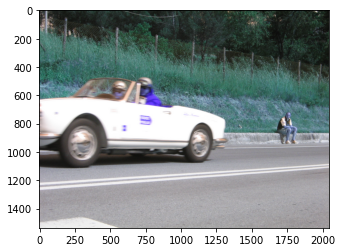

In [4]:
img = cv2.imread('MICC-F2000/original/00001_2_scale.jpg')
print(img.shape)
plt.imshow(img)

(256, 256, 3)


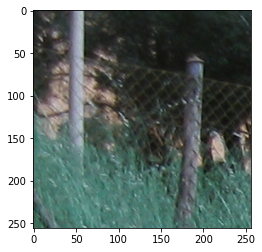

In [5]:
img_cropped = img[0:0+256, 0:0+256]
print(img_cropped.shape)
plt.imshow(img_cropped)

In [8]:
img_cl_names[0][0]

'00007tamp1.jpg'

In [9]:
with open('MICC-F2000/ext_classes.txt', 'w') as dest_file:
    for img_data in img_cl_names:
        img = cv2.imread('MICC-F2000/original/' + img_data[0])
        height = img.shape[0]
        width = img.shape[1]
        img_0 = img[0:256, 0:256]
        img_1 = img[0:256, width-256:width]
        img_2 = img[height-256:height, 0:256]
        img_3 = img[height-256:height, width-256:width]
        img_4 = img[int(height/2)-128:int(height/2)+128, int(width/2)-128:int(width/2)+128]

        cv2.imwrite('MICC-F2000/extended/' + img_data[0].split('.')[0] + '_0.png', img_0)
        cv2.imwrite('MICC-F2000/extended/' + img_data[0].split('.')[0] + '_1.png', img_1)
        cv2.imwrite('MICC-F2000/extended/' + img_data[0].split('.')[0] + '_2.png', img_2)
        cv2.imwrite('MICC-F2000/extended/' + img_data[0].split('.')[0] + '_3.png', img_3)
        cv2.imwrite('MICC-F2000/extended/' + img_data[0].split('.')[0] + '_4.png', img_4)

        dest_file.write(img_data[0].split('.')[0] + '_0.png\t' + str(img_data[1]) + '\n')
        dest_file.write(img_data[0].split('.')[0] + '_1.png\t' + str(img_data[1]) + '\n')
        dest_file.write(img_data[0].split('.')[0] + '_2.png\t' + str(img_data[1]) + '\n')
        dest_file.write(img_data[0].split('.')[0] + '_3.png\t' + str(img_data[1]) + '\n')
        dest_file.write(img_data[0].split('.')[0] + '_4.png\t' + str(img_data[1]) + '\n')

dest_file.close()